In [2]:
using PyPlot,JLD2

In [3]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")

plot_likelihood (generic function with 2 methods)

In [5]:
methods(plot_likelihood)

# 2 methods for generic function "plot_likelihood":
[1] plot_likelihood(jldfit, mcmc, nbins) in Main at /Users/bethleelindor/work/washington/ttv_project/ttv_ss/plot_likelihood.jl:22
[2] plot_likelihood(sigma, nyear, nbins, include_moon::Bool) in Main at /Users/bethleelindor/work/washington/ttv_project/ttv_ss/plot_likelihood.jl:96

# from V + EMB transits

In [6]:
BIC(chi2,k,Nobs) = chi2 + k*log(Nobs)

BIC (generic function with 1 method)

In [12]:
println("BIC for p2 fits from EMB+V sims.")
println("BIC for 10s15 = ",BIC(2545,10,41))
println("BIC for 10s20 = ",BIC(3059,10,54))
println("BIC for 10s25 = ",BIC(4699,10,67))
println("BIC for 10s30 = ",BIC(4941,10,80))
println("BIC for 30s15 = ",BIC(316,10,41))
println("BIC for 30s20 = ",BIC(357,10,54))
println("BIC for 30s25 = ",BIC(590,10,67))
println("BIC for 30s30 = ",BIC(585,10,80))
println("BIC for 60s15 = ",BIC(108,10,41))
println("BIC for 60s20 = ",BIC(119,10,54))
println("BIC for 60s25 = ",BIC(201,10,67))
println("BIC for 60s30 = ",BIC(191,10,80))
println("BIC for 90s15 = ",BIC(70,10,41))
println("BIC for 90s20 = ",BIC(79,10,54))
println("BIC for 90s25 = ",BIC(127,10,67))
println("BIC for 90s30 = ",BIC(121,10,80))
println("BIC for 120s15 = ",BIC(56,10,41))
println("BIC for 120s20 = ",BIC(66,10,54))
println("BIC for 120s25 = ",BIC(101,10,67))
println("BIC for 120s30 = ",BIC(97,10,80))

BIC for p2 fits from EMB+V sims.
BIC for 10s15 = 2582.135720667043
BIC for 10s20 = 3098.889840465643
BIC for 10s25 = 4741.04692619391
BIC for 10s30 = 4984.820266346739
BIC for 30s15 = 353.1357206670431
BIC for 30s20 = 396.88984046564275
BIC for 30s25 = 632.0469261939097
BIC for 30s30 = 628.8202663467388
BIC for 60s15 = 145.13572066704307
BIC for 60s20 = 158.88984046564275
BIC for 60s25 = 243.04692619390966
BIC for 60s30 = 234.8202663467388
BIC for 90s15 = 107.13572066704307
BIC for 90s20 = 118.88984046564275
BIC for 90s25 = 169.04692619390966
BIC for 90s30 = 164.8202663467388
BIC for 120s15 = 93.13572066704307
BIC for 120s20 = 105.88984046564275
BIC for 120s25 = 143.04692619390966
BIC for 120s30 = 140.8202663467388


In [14]:
println("BIC for p3 fits from EMB+V sims.")
println("BIC for 10s15 = ",BIC(137,15,41))
println("BIC for 10s20 = ",BIC(238,15,54))
println("BIC for 10s25 = ",BIC(350,15,67))
println("BIC for 10s30 = ",BIC(472,15,80))
println("BIC for 30s15 = ",BIC(52,15,41))
println("BIC for 30s20 = ",BIC(69,15,54))
println("BIC for 30s25 = ",BIC(91,15,67))
println("BIC for 30s30 = ",BIC(109,15,80))
println("BIC for 60s15 = ",BIC(41,15,41))
println("BIC for 60s20 = ",BIC(52,15,54))
println("BIC for 60s25 = ",BIC(68,15,67))
println("BIC for 60s30 = ",BIC(76,15,80))
println("BIC for 90s15 = ",BIC(39,15,41))
println("BIC for 90s20 = ",BIC(48,15,54))
println("BIC for 90s25 = ",BIC(64,15,67))
println("BIC for 90s30 = ",BIC(68,15,80))
println("BIC for 120s15 = ",BIC(37,15,41))
println("BIC for 120s20 = ",BIC(47,15,54))
println("BIC for 120s25 = ",BIC(62,15,67))
println("BIC for 120s30 = ",BIC(66,15,80))

BIC for p3 fits from EMB+V sims.
BIC for 10s15 = 192.7035810005646
BIC for 10s20 = 297.8347606984641
BIC for 10s25 = 413.07038929086445
BIC for 10s30 = 537.7303995201082
BIC for 30s15 = 107.70358100056461
BIC for 30s20 = 128.83476069846412
BIC for 30s25 = 154.07038929086448
BIC for 30s30 = 174.73039952010822
BIC for 60s15 = 96.70358100056461
BIC for 60s20 = 111.83476069846412
BIC for 60s25 = 131.07038929086448
BIC for 60s30 = 141.73039952010822
BIC for 90s15 = 94.70358100056461
BIC for 90s20 = 107.83476069846412
BIC for 90s25 = 127.07038929086448
BIC for 90s30 = 133.73039952010822
BIC for 120s15 = 92.70358100056461
BIC for 120s20 = 106.83476069846412
BIC for 120s25 = 125.07038929086448
BIC for 120s30 = 131.73039952010822


In [31]:
function EMB_vals(sigma,nyear,np)
mcfile = string("MCMC/fromEMB/",np,"_mcmc",sigma,"s",nyear,"yrs.jld2")
jldmc = jldopen(String(mcfile),"r")
par_mcmc,lprob_mcmc = jldmc["par_mcmc"],jldmc["lprob_mcmc"]
param = jldmc["param"]
iburn,samples = jldmc["iburn"], jldmc["indepsamples"]
nwalkers,nsteps = jldmc["nwalkers"],jldmc["nsteps"]
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
      "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
      "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
    "sig sys"]
for i=1:3
# println(pname[(i-1)*5+1]," ",pname[(i-1)*5+2]," ",pname[(i-1)*5+3]," ",pname[(i-1)*5+4]," ",pname[(i-1)*5+5])
println(mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+2]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+2]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+3]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+3]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+4]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+4]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+5]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+5])))
        
#             println(vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH, vec(par_mcmc[:,iburn:nsteps,2]),vec(par_mcmc[:,iburn:nsteps,3]),vec(par_mcmc[:,iburn:nsteps,4]),vec(par_mcmc[:,iburn:nsteps,5]))
#         println("param ",i," mean ",mean(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i])," with std +/- ", std(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i]))
end
end

EMB_vals (generic function with 1 method)

In [32]:
EMB_vals(30.0,30.0,"p3")

2.5301061966972468e-6 pm 1.9936400235702785e-7 & 224.70078005992036 pm 4.734513586289764e-6 & 2.4335037653524964e6 pm 0.0001314128538136101 & -0.0013825181295904787 pm 0.008188421642423924 & 0.0017743006081065184 pm 0.007414633107774482
3.0254164273650215e-6 pm 1.3585192969894088e-7 & 365.2564541257616 pm 1.0654905791385079e-5 & 2.433624402171579e6 pm 0.00017984324181497555 & 0.01297960199539626 pm 0.006490674295005386 & 0.0038207822369837273 pm 0.0059243024331998425
0.0007132664150713779 pm 0.0001496127365977069 & 4205.728407351216 pm 59.66873631806816 & 2.4390911392614944e6 pm 100.54212195172065 & -0.0023807229611907677 pm 0.03135303376327694 & -0.0366999110210406 pm 0.02065711056814555


In [ ]:
EMB_vals(30.0,30.0,"p3")

# from E+V transits

In [9]:
println("BIC for p2 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(2897,10,41))
println("BIC for 10s20 = ",BIC(3633,10,54))
println("BIC for 10s25 = ",BIC(5252,10,67))
println("BIC for 10s30 = ",BIC(5677,10,80))
println("BIC for 30s15 = ",BIC(359,10,41))
println("BIC for 30s20 = ",BIC(417,10,54))
println("BIC for 30s25 = ",BIC(649,10,67))
println("BIC for 30s30 = ",BIC(667,10,80))
println("BIC for 60s15 = ",BIC(119,10,41))
println("BIC for 60s20 = ",BIC(133,10,54))
println("BIC for 60s25 = ",BIC(214,10,67))
println("BIC for 60s30 = ",BIC(211,10,80))
println("BIC for 90s15 = ",BIC(75,10,41))
println("BIC for 90s20 = ",BIC(84,10,54))
println("BIC for 90s25 = ",BIC(133,10,67))
println("BIC for 90s30 = ",BIC(129,10,80))
println("BIC for 120s15 = ",BIC(59,10,41))
println("BIC for 120s20 = ",BIC(69,10,54))
println("BIC for 120s25 = ",BIC(104,10,67))
println("BIC for 120s30 = ",BIC(102,10,80))

BIC for p2 fits from E+V sims.
BIC for 10s15 = 2934.135720667043
BIC for 10s20 = 3672.889840465643
BIC for 10s25 = 5294.04692619391
BIC for 10s30 = 5720.820266346739
BIC for 30s15 = 396.1357206670431
BIC for 30s20 = 456.88984046564275
BIC for 30s25 = 691.0469261939097
BIC for 30s30 = 710.8202663467388
BIC for 60s15 = 156.13572066704307
BIC for 60s20 = 172.88984046564275
BIC for 60s25 = 256.04692619390966
BIC for 60s30 = 254.8202663467388
BIC for 90s15 = 112.13572066704307
BIC for 90s20 = 123.88984046564275
BIC for 90s25 = 175.04692619390966
BIC for 90s30 = 172.8202663467388
BIC for 120s15 = 96.13572066704307
BIC for 120s20 = 108.88984046564275
BIC for 120s25 = 146.04692619390966
BIC for 120s30 = 145.8202663467388


In [10]:
println("BIC for p3 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(394,15,41))
println("BIC for 10s20 = ",BIC(675,15,54))
println("BIC for 10s25 = ",BIC(1214,15,67))
println("BIC for 10s30 = ",BIC(1414,15,80))
println("BIC for 30s15 = ",BIC(76,15,41))
println("BIC for 30s20 = ",BIC(104,15,54))
println("BIC for 30s25 = ",BIC(183,15,67))
println("BIC for 30s30 = ",BIC(216,15,80))
println("BIC for 60s15 = ",BIC(49,15,41))
println("BIC for 60s20 = ",BIC(54,15,54))
println("BIC for 60s25 = ",BIC(87,15,67))
println("BIC for 60s30 = ",BIC(102,15,80))
println("BIC for 90s15 = ",BIC(40,15,41))
println("BIC for 90s20 = ",BIC(46,15,54))
println("BIC for 90s25 = ",BIC(71,15,67))
println("BIC for 90s30 = ",BIC(79,15,80))
println("BIC for 120s15 = ",BIC(36,15,41))
println("BIC for 120s20 = ",BIC(45,15,54))
println("BIC for 120s25 = ",BIC(66,15,67))
println("BIC for 120s30 = ",BIC(70,15,80))

BIC for p3 fits from E+V sims.
BIC for 10s15 = 449.7035810005646
BIC for 10s20 = 734.8347606984642
BIC for 10s25 = 1277.0703892908646
BIC for 10s30 = 1479.7303995201082
BIC for 30s15 = 131.7035810005646
BIC for 30s20 = 163.83476069846412
BIC for 30s25 = 246.07038929086448
BIC for 30s30 = 281.7303995201082
BIC for 60s15 = 104.70358100056461
BIC for 60s20 = 113.83476069846412
BIC for 60s25 = 150.07038929086448
BIC for 60s30 = 167.73039952010822
BIC for 90s15 = 95.70358100056461
BIC for 90s20 = 105.83476069846412
BIC for 90s25 = 134.07038929086448
BIC for 90s30 = 144.73039952010822
BIC for 120s15 = 91.70358100056461
BIC for 120s20 = 104.83476069846412
BIC for 120s25 = 129.07038929086448
BIC for 120s30 = 135.73039952010822


In [11]:
println("BIC for lunar fits from E+V sims.")
println("BIC for 10s15 = ",BIC(284,18,41))
println("BIC for 10s20 = ",BIC(400,18,54))
println("BIC for 10s25 = ",BIC(350,18,67))
println("BIC for 10s30 = ",BIC(464,18,80))
println("BIC for 30s15 = ",BIC(52,18,41))
println("BIC for 30s20 = ",BIC(66,18,54))
println("BIC for 30s25 = ",BIC(88,18,67))
println("BIC for 30s30 = ",BIC(108,18,80))
println("BIC for 60s15 = ",BIC(41,18,41))
println("BIC for 60s20 = ",BIC(50,18,54))
println("BIC for 60s25 = ",BIC(66,18,67))
println("BIC for 60s30 = ",BIC(76,18,80))
println("BIC for 90s15 = ",BIC(34,18,41))
println("BIC for 90s20 = ",BIC(45,18,54))
println("BIC for 90s25 = ",BIC(62,18,67))
println("BIC for 90s30 = ",BIC(68,18,80))
println("BIC for 120s15 = ",BIC(32,18,41))
println("BIC for 120s20 = ",BIC(44,18,54))
println("BIC for 120s25 = ",BIC(60,18,67))
println("BIC for 120s30 = ",BIC(67,18,80))

BIC for lunar fits from E+V sims.
BIC for 10s15 = 350.84429720067754
BIC for 10s20 = 471.80171283815696
BIC for 10s25 = 425.6844671490374
BIC for 10s30 = 542.8764794241299
BIC for 30s15 = 118.84429720067754
BIC for 30s20 = 137.80171283815696
BIC for 30s25 = 163.6844671490374
BIC for 30s30 = 186.87647942412985
BIC for 60s15 = 107.84429720067754
BIC for 60s20 = 121.80171283815694
BIC for 60s25 = 141.6844671490374
BIC for 60s30 = 154.87647942412985
BIC for 90s15 = 100.84429720067754
BIC for 90s20 = 116.80171283815694
BIC for 90s25 = 137.6844671490374
BIC for 90s30 = 146.87647942412985
BIC for 120s15 = 98.84429720067754
BIC for 120s20 = 115.80171283815694
BIC for 120s25 = 135.6844671490374
BIC for 120s30 = 145.87647942412985


In [15]:
println("BIC for p4 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(88,20,41))
println("BIC for 10s20 = ",BIC(190,20,54))
println("BIC for 10s25 = ",BIC(346,20,67))
println("BIC for 10s30 = ",BIC(450,20,80))
println("BIC for 30s15 = ",BIC(35,20,41))
println("BIC for 30s20 = ",BIC(59,20,54))
println("BIC for 30s25 = ",BIC(80,20,67))
println("BIC for 30s30 = ",BIC(98,20,80))
# println("BIC for 60s15 = ",BIC(,20,41))
# println("BIC for 60s20 = ",BIC(,20,54))
# println("BIC for 60s25 = ",BIC(,20,67))
# println("BIC for 60s30 = ",BIC(,20,80))
# println("BIC for 90s15 = ",BIC(,20,41))
# println("BIC for 90s20 = ",BIC(,20,54))
# println("BIC for 90s25 = ",BIC(,20,67))
# println("BIC for 90s30 = ",BIC(,20,80))
# println("BIC for 120s15 = ",BIC(,20,41))
# println("BIC for 120s20 = ",BIC(,20,54))
# println("BIC for 120s25 = ",BIC(,20,67))
# println("BIC for 120s30 = ",BIC(,20,80))

BIC for p4 fits from E+V sims.
BIC for 10s15 = 162.27144133408615
BIC for 10s20 = 269.7796809312855
BIC for 10s25 = 430.0938523878193
BIC for 10s30 = 537.6405326934777
BIC for 30s15 = 109.27144133408616
BIC for 30s20 = 138.7796809312855
BIC for 30s25 = 164.0938523878193
BIC for 30s30 = 185.6405326934776


In [37]:
function EV_vals(sigma,nyear,np,p)
mcfile = string("MCMC/",np,"_mcmc",sigma,"s",nyear,"yrs.jld2")
jldmc = jldopen(String(mcfile),"r")
par_mcmc,lprob_mcmc = jldmc["par_mcmc"],jldmc["lprob_mcmc"]
param = jldmc["param"]
iburn,samples = jldmc["iburn"], jldmc["indepsamples"]
nwalkers,nsteps = jldmc["nwalkers"],jldmc["nsteps"]
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
      "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
      "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
    "sig sys"]
for i=1:p
# println(pname[(i-1)*5+1]," ",pname[(i-1)*5+2]," ",pname[(i-1)*5+3]," ",pname[(i-1)*5+4]," ",pname[(i-1)*5+5])
println(mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+2]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+2]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+3]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+3]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+4]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+4]))," & ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+5]))," pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+5])))
        
#             println(vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH, vec(par_mcmc[:,iburn:nsteps,2]),vec(par_mcmc[:,iburn:nsteps,3]),vec(par_mcmc[:,iburn:nsteps,4]),vec(par_mcmc[:,iburn:nsteps,5]))
#         println("param ",i," mean ",mean(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i])," with std +/- ", std(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i]))
end
end

EV_vals (generic function with 2 methods)

In [39]:
EV_vals(30.0,30.0,"p3",3)

4.277777943953792e-6 pm 3.7142162426515576e-7 & 224.70077989527348 pm 6.850326373228977e-6 & 2.433503768677856e6 pm 0.0001895781411551468 & -0.03237541594434242 pm 0.025134623249431786 & -0.03745050123833414 pm 0.018479987890360695
2.8489625143019485e-6 pm 2.21079998659349e-7 & 365.2564588303995 pm 1.5419988673926825e-5 & 2.4336244073983026e6 pm 0.0002589443198085363 & -0.008971047326566893 pm 0.019993982503971698 & -0.028249317136878917 pm 0.014615457573108824
0.0004642216710385977 pm 0.00016353385592363985 & 4206.753335395818 pm 99.72533092791215 & 2.439486123130137e6 pm 313.17362207535587 & -0.0847365560126544 pm 0.06998915089996309 & 0.028887089186787136 pm 0.07262244685493675


In [40]:
EV_vals(30.0,30.0,"moon",3)

2.349471045645229e-6 pm 4.1180028163060775e-7 & 224.70078013667762 pm 4.809564207360931e-6 & 2.433503768676552e6 pm 0.000134285880257247 & -0.0012323090902117064 pm 0.008004899148077622 & -0.0013637121547200545 pm 0.008174308311297845
3.0214021085761107e-6 pm 1.3804428056950639e-7 & 365.25645245596144 pm 1.118344348503024e-5 & 2.433624407486904e6 pm 0.00018844512372873969 & 0.012671454792082126 pm 0.006362645896715274 & 0.0011774473500074819 pm 0.00659767810659276
0.0007348205253857753 pm 0.00015115749404662554 & 4218.237610107384 pm 60.98880655699188 & 2.439129130171979e6 pm 108.90024968535536 & -0.0016163167220159314 pm 0.031260536563416715 & -0.028279641444493693 pm 0.02064658465498574


In [38]:
EV_vals(30.0,30.0,"p4",4)

2.4254021898565044e-6 pm 3.9112916402912604e-7 & 224.70078001250306 pm 4.820335510896298e-6 & 2.4335037686831676e6 pm 0.00013429452515656428 & -0.004033463242426973 pm 0.006635039340114886 & -0.0010572106310781013 pm 0.006512183047611868
3.06599261223061e-6 pm 1.347623596177859e-7 & 365.256455601218 pm 9.67530026536933e-6 & 2.4336244074236997e6 pm 0.00016805986749943597 & 0.01060036878671825 pm 0.005177725710924421 & 0.0014854390963827875 pm 0.005289251747269766
9.352311442145542e-5 pm 1.2929300089533947e-5 & 1733.7132984001298 pm 3.7506711313439354 & 2.4394068513666876e6 pm 8.663152634229942 & 0.2544115969228625 pm 0.015911593951587675 & 0.019854352413227205 pm 0.021202693978328007
0.0006994410495361206 pm 0.000135583639271824 & 4191.008449877565 pm 0.18790789118598414 & 1.5776024090222422 pm 0.7343699537681054 & -0.00936144889386383 pm 0.03311103492858695 & -0.024581727675632593 pm 0.02159404482678326


In [4]:
# p_11=jldopen("FITS/p3_fit10.0s10.0yrs.jld2");p_mc11 = jldopen("MCMC/p3_mcmc10.0s10.0yrs.jld2");
p_115=jldopen("FITS/fromEMB/p3_fit10.0s15.0yrs.jld2","r");
p_mc115 = jldopen("MCMC/fromEMB/p3_mcmc10.0s15.0yrs.jld2","r");
p_12=jldopen("FITS/fromEMB/p3_fit10.0s20.0yrs.jld2","r");
p_mc12 = jldopen("MCMC/fromEMB/p3_mcmc10.0s20.0yrs.jld2","r");
p_125=jldopen("FITS/fromEMB/p3_fit10.0s25.0yrs.jld2","r");
p_mc125 = jldopen("MCMC/fromEMB/p3_mcmc10.0s25.0yrs.jld2","r");
p_13=jldopen("FITS/fromEMB/p3_fit10.0s30.0yrs.jld2","r")
p_mc13 = jldopen("MCMC/fromEMB/p3_mcmc10.0s30.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/MCMC/fromEMB/p3_mcmc10.0s30.0yrs.jld2 (read-only)
 ├─🔢 par_mcmc
 ├─🔢 lprob_mcmc
 ├─🔢 param
 ├─🔢 nwalkers
 ├─🔢 nsteps
 ├─🔢 accept
 ├─🔢 iburn
 └─🔢 indepsamples

In [19]:
p_315=jldopen("FITS/fromEMB/p3_fit30.0s15.0yrs.jld2","r")
p_32=jldopen("FITS/fromEMB/p3_fit30.0s20.0yrs.jld2","r")
p_325=jldopen("FITS/fromEMB/p3_fit30.0s25.0yrs.jld2","r")
p_33=jldopen("FITS/fromEMB/p3_fit30.0s30.0yrs.jld2","r")
p_615=jldopen("FITS/fromEMB/p3_fit60.0s15.0yrs.jld2","r")
# p_62=jldopen("FITS/fromEMB/p3_fit60.0s2.0yrs.jld2","r") #doesnt exist atm
p_625=jldopen("FITS/fromEMB/p3_fit60.0s25.0yrs.jld2","r")
p_63=jldopen("FITS/fromEMB/p3_fit60.0s30.0yrs.jld2","r")
p_915=jldopen("FITS/fromEMB/p3_fit90.0s15.0yrs.jld2","r")
p_92=jldopen("FITS/fromEMB/p3_fit90.0s20.0yrs.jld2","r") 
p_925=jldopen("FITS/fromEMB/p3_fit90.0s25.0yrs.jld2","r")
p_93=jldopen("FITS/fromEMB/p3_fit90.0s30.0yrs.jld2","r")
p_1215=jldopen("FITS/fromEMB/p3_fit120.0s15.0yrs.jld2","r")
p_122=jldopen("FITS/fromEMB/p3_fit120.0s20.0yrs.jld2","r")
p_1225=jldopen("FITS/fromEMB/p3_fit120.0s25.0yrs.jld2","r")
p_123=jldopen("FITS/fromEMB/p3_fit120.0s30.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/fromEMB/p3_fit120.0s30.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 p3best
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 └─🔢 nphase

In [35]:
m_315=jldopen("FITS/moon_fit30.0s15.0yrs.jld2","r")
m_325=jldopen("FITS/moon_fit30.0s25.0yrs.jld2","r")
# m_32=jldopen("FITS/moon_fit30.0s20.0yrs.jld2","r") # wrong file atm
m_33=jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r") 
m_615=jldopen("FITS/moon_fit60.0s15.0yrs.jld2","r")
m_625=jldopen("FITS/moon_fit60.0s25.0yrs.jld2","r")
m_62=jldopen("FITS/moon_fit60.0s20.0yrs.jld2","r")
m_63=jldopen("FITS/moon_fit60.0s30.0yrs.jld2","r")
m_915=jldopen("FITS/moon_fit90.0s15.0yrs.jld2","r")
m_925=jldopen("FITS/moon_fit90.0s25.0yrs.jld2","r")
m_92=jldopen("FITS/moon_fit90.0s20.0yrs.jld2","r")
m_93=jldopen("FITS/moon_fit90.0s30.0yrs.jld2","r")
m_1215=jldopen("FITS/moon_fit120.0s15.0yrs.jld2","r")
m_1225=jldopen("FITS/moon_fit120.0s25.0yrs.jld2","r")
m_122=jldopen("FITS/moon_fit120.0s20.0yrs.jld2","r")
m_123=jldopen("FITS/moon_fit120.0s30.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/moon_fit120.0s30.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 deltaphi
 ├─🔢 lprob_dp
 ├─🔢 best_dp
 ├─🔢 lprob_best_dp
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [199]:
p4b33=jldopen("FITS/fromEMB/p4_fit30.0s30.0yrs.jld2","r") #no pins and pouts

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/fromEMB/p4_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 p4
 ├─🔢 lprob_p4
 ├─🔢 best_p4
 ├─🔢 lprob_best_p4
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 └─🔢 sigtt

In [217]:
p4_33=jldopen("FITS/p4_fit30.0s30.0yrs.jld2","r") 
p4_32=jldopen("FITS/p4_fit30.0s20.0yrs.jld2","r") #no pins and pouts
p4_315=jldopen("FITS/p4_fit30.0s15.0yrs.jld2","r") 
p4_325=jldopen("FITS/p4_fit30.0s25.0yrs.jld2","r") 
p4_63=jldopen("FITS/p4_fit60.0s30.0yrs.jld2","r") #no pins and pouts
p4_62=jldopen("FITS/p4_fit60.0s20.0yrs.jld2","r") #no pins and pouts
#p4_625=jldopen("FITS/p4_fit60.0s25.0yrs.jld2","r") # doesn't exist
p4_615=jldopen("FITS/p4_fit60.0s15.0yrs.jld2","r") #no pins and pouts
p4_93=jldopen("FITS/p4_fit90.0s30.0yrs.jld2","r") #no pins and pouts
p4_92=jldopen("FITS/p4_fit90.0s20.0yrs.jld2","r") #no pins and pouts
p4_915=jldopen("FITS/p4_fit90.0s15.0yrs.jld2","r") #no pins and pouts
p4_925=jldopen("FITS/p4_fit90.0s25.0yrs.jld2","r") #no pins and pouts
    # p4_123=jldopen("FITS/p4_fit120.0s30.0yrs.jld2","r") # doesnt exist
    # p4_122=jldopen("FITS/p4_fit120.0s20.0yrs.jld2","r") # doesnt exist
    # p4_1215=jldopen("FITS/p4_fit120.0s15.0yrs.jld2","r") # doesnt exist
    # p4_1225=jldopen("FITS/p4_fit120.0s25.0yrs.jld2","r") # doesnt exist

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/p4_fit90.0s25.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 p4
 ├─🔢 lprob_p4
 ├─🔢 best_p4
 ├─🔢 lprob_best_p4
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 └─🔢 sigtt

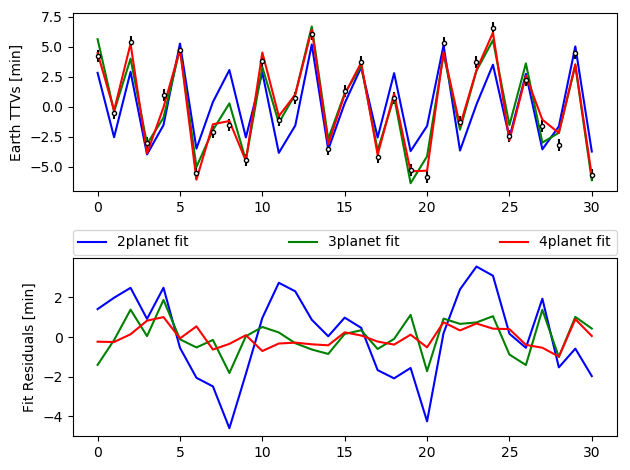

In [204]:
# include("decompose_ttvs.jl") 
function plot_res(file1,name)
tt,tt0,sigtt,ttmodel = file1["tt"],file1["tt0"],file1["sigtt"],file1["ttmodel"]
pbest_global = file1[String(name)]
nplanet,ntrans = file1["nplanet"],file1["ntrans"]
p2_ttvs =  decompose_ttvs(2,ntrans,file1["best_p3"][1:10]) .* (24 * 60)
p3_ttvs = decompose_ttvs(3,ntrans,file1["best_p3"][1:15]) .* (24 * 60)
n1,n2 = ntrans[1],ntrans[2]
mu1,P1,t01,ecos1,esin1 = pbest_global[1:5]
mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1,tt2 = file1["tt"][1:n1],file1["tt"][n1+1:n1+n2]
ttsim1,ttsim2 = (file1["ttmodel"][1:n1].-t01)./365.25,(file1["ttmodel"][n1+1:n1+n2].-t02)./365.25 #in years
ttv1,ttv2 = (tt1.-time1).* (24 * 60),(tt2.-time2).* (24 * 60) #in minutes
sigtt1,sigtt2 = sigtt[1:n1].* (24 * 60),sigtt[n1+1:n1+n2].* (24 * 60) #in minutes
fig=figure()
ax1=subplot(211)
# plot(ttsim1,pair_ttvs[1,3,1:n1]+p3_ttvs[1,2,1:n1],linewidth=2,color="grey")#,label="Total variations")
# #   plot(ttsim1,p3_ttvs[1,3,1:n1],color="firebrick",label="Jupiter contribution",alpha=0.9)
# #   plot(ttsim1,p3_ttvs[1,2,1:n1],label="Earth contribution",alpha=0.9,linestyle="--")
# # plot(ttsim1,ttv1,linewidth=1.25,color="grey",label="Obs variations")
# errorbar(ttsim1,ttv1,sigtt1,fmt=".",color="black",mec="black",mfc="white")
# ylabel("Venus TTVs [min]")
# xlabel("Time Observed [yrs]")
# #   ax1.minorticks_on()
# #   ax1.tick_params(which="both",direction="in",top="true",right="true")
# #   # ax1.tick_params(which="major",direction="in",top="true",right="true",length=6)
# #   # ax1.tick_params(which="minor",direction="in",top="true",right="true",length=2)
# #   ax1.legend(bbox_to_anchor=(0.,1.02,1.,.102),loc="lower left",
# #       ncol=3,mode="expand",borderaxespad=0.0)
# subplot(222)
# plot(ttsim1,ttv1-(p3_ttvs[1,3,1:n1]+p3_ttvs[1,2,1:n1]),color="black")
# ylabel("Fit Residuals [min]")
# ax2=subplot(223,sharex=ax1)
plot(ttsim2,p2_ttvs[2,1,1:n2],color="blue",label="2planet fit")
plot(ttsim2,p3_ttvs[2,3,1:n2]+p3_ttvs[2,1,1:n2],color="green",label="3planet fit")
errorbar(ttsim2,ttv2,sigtt2,fmt=".",color="black",mec="black",mfc="white")
ylabel("Earth TTVs [min]")
# ylabel("EMB TTVs [min]")
ax2=subplot(212)
plot(ttsim2,ttv2-(p2_ttvs[2,1,1:n2]),color="blue",label="2planet fit")
plot(ttsim2,ttv2-(p3_ttvs[2,3,1:n2]+p3_ttvs[2,1,1:n2]),color="green",label="3planet fit")
ylabel("Fit Residuals [min]")
if length(pbest_global)==18 
    moon = moon_ttvs(ntrans,pbest_global) .* (24 * 60)
    ax1.plot(ttsim2,p3_ttvs[2,3,1:n2]+p3_ttvs[2,1,1:n2]+moon,color="red",label="3planet fit + moon")
    ax2.plot(ttsim2,ttv2-(p3_ttvs[2,3,1:n2]+p3_ttvs[2,1,1:n2]+moon),color="red",label="3planet fit + moon")
elseif length(pbest_global) > 18
    p4_ttvs = decompose_ttvs(4,ntrans,pbest_global[1:end]) .* (24 * 60)
    ax1.plot(ttsim2,p4_ttvs[2,4,1:n2]+p4_ttvs[2,3,1:n2]+p4_ttvs[2,1,1:n2],color="red",label="4planet fit")
    ax2.plot(ttsim2,ttv2-(p4_ttvs[2,4,1:n2]+p4_ttvs[2,3,1:n2]+p4_ttvs[2,1,1:n2]),color="red",label="4planet fit")
end
legend(bbox_to_anchor=(0.,1.02,1.,.102),loc="lower left",
      ncol=3,mode="expand",borderaxespad=0.0)
tight_layout()
end
plot_res(p4_33,"best_p4")

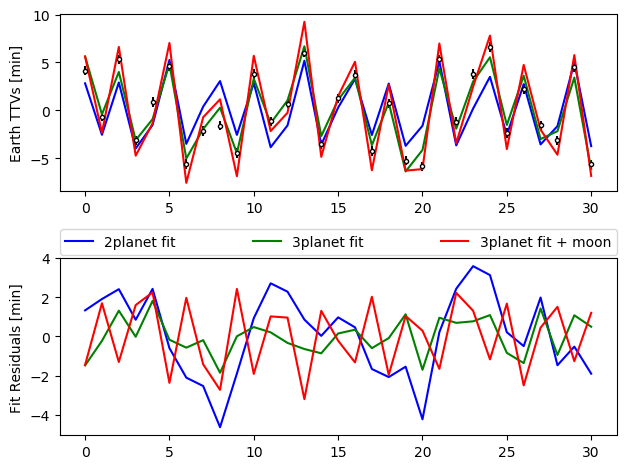

In [192]:
plot_res(m_33,"best_dp")

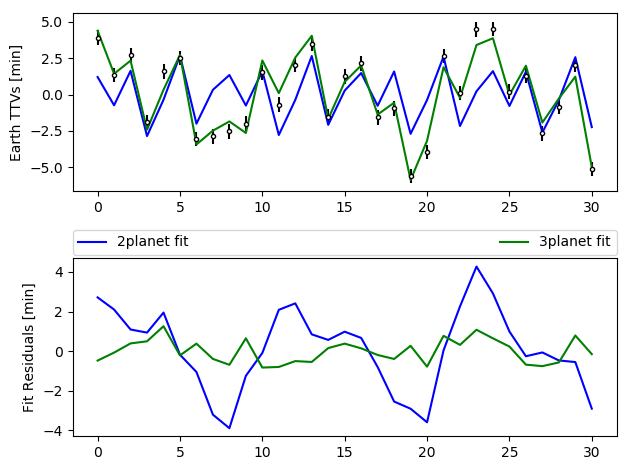

In [194]:
plot_res(p_33,"best_p3") #from EMB need to add p4

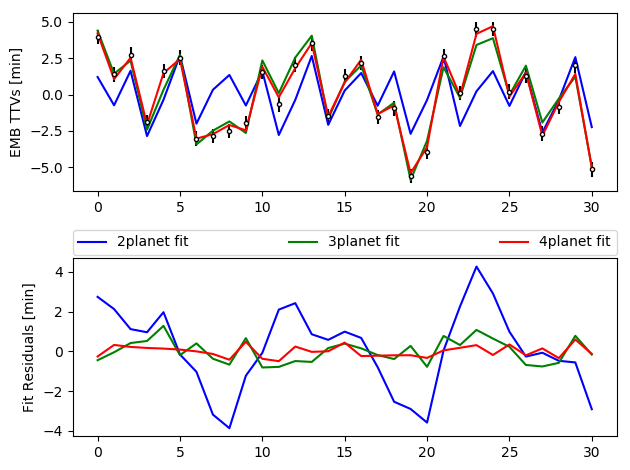

In [203]:
plot_res(p4b33,"best_p4")

In [234]:
function plot_diff(file1,file2)
tt,tt0,sigtt,ttmodel = file1["tt"],file1["tt0"],file1["sigtt"],file1["ttmodel"]
pbest_global = file1["best_p3"] #file1["best_p3"]
nplanet,ntrans = file1["nplanet"],file1["ntrans"]
# p2_ttvs =  decompose_ttvs(2,ntrans,pbest_global[1:10]) .* (24 * 60)
file1_ttvs = decompose_ttvs(3,ntrans,pbest_global[1:15]) .* (24 * 60)
moon = moon_ttvs(ntrans,file1["best_dp"][16:18]) .* (24 * 60)
n1_1,n2_1 = ntrans[1],ntrans[2]
mu1_1,P1_1,t01_1,ecos1_1,esin1_1 = pbest_global[1:5]
mu2_1,P2_1,t02_1,ecos2_1,esin2_1 = pbest_global[6:10]
time1_1 = collect(t01_1 .+ range(0,stop=n1_1-1,length=n1_1) .* P1_1)
time2_1 = collect(t02_1 .+ range(0,stop=n2_1-1,length=n2_1) .* P2_1)
tt1_1,tt2_1 = tt[1:n1_1],tt[n1_1+1:n1_1+n2_1]
ttsim1_1,ttsim2_1 = (file1["ttmodel"][1:n1_1].-t01_1)./365.25,(file1["ttmodel"][n1_1+1:n1_1+n2_1].-t02_1)./365.25 #in years
ttv1_1,ttv2_1 = (tt1_1.-time1_1).* (24 * 60),(tt2_1.-time2_1).* (24 * 60) #in minutes
sigtt1_1,sigtt2_1 = sigtt[1:n1_1].* (24 * 60),sigtt[n1_1+1:n1_1+n2_1].* (24 * 60) #in minutes

tt,tt0,sigtt,ttmodel = file2["tt"],file2["tt0"],file2["sigtt"],file2["ttmodel"]
pbest_global = file2["best_p3"]
nplanet,ntrans = file2["nplanet"],file2["ntrans"]
file2_ttvs = decompose_ttvs(3,ntrans,pbest_global[1:15]) .* (24 * 60)
n1_2,n2_2 = ntrans[1],ntrans[2]
mu1_2,P1_2,t01_2,ecos1_2,esin1_2 = pbest_global[1:5]
mu2_2,P2_2,t02_2,ecos2_2,esin2_2 = pbest_global[6:10]
time1_2 = collect(t01_2 .+ range(0,stop=n1_2-1,length=n1_2) .* P1_2)
time2_2 = collect(t02_2 .+ range(0,stop=n2_2-1,length=n2_2) .* P2_2)
tt1_2,tt2_2 = tt[1:n1_2],tt[n1_2+1:n1_2+n2_2]
ttsim1_2,ttsim2_2 = (file2["ttmodel"][1:n1_2].-t01_2)./365.25,(file2["ttmodel"][n1_2+1:n1_2+n2_2].-t02_2)./365.25 #in years
ttv1_2,ttv2_2 = (tt1_2.-time1_2).* (24 * 60),(tt2_2.-time2_2).* (24 * 60) #in minutes
sigtt1_2,sigtt2_2 = sigtt[1:n1_2].* (24 * 60),sigtt[n1_2+1:n1_2+n2_2].* (24 * 60) #in minutes

figure(figsize=(6,3))
title("3p + moon vs 3p")
ax1=subplot(211)
ax1.errorbar(ttsim2_1,ttv2_1,sigtt2_1,fmt=".",color="black",mec="black",mfc="white")#,label="from V + E")
ax1.plot(ttsim2_1,file1_ttvs[2,3,1:n2_1]+file1_ttvs[2,1,1:n2_1]+moon,label="3p+moon fit for Earth")
ylabel("Earth TTVs [min]")
ax2=subplot(212)
ax2.errorbar(ttsim2_2,ttv2_2,sigtt2_2,fmt=".",color="black",mec="black",mfc="white")#,label="from V + EMB")
ax2.plot(ttsim2_2,file2_ttvs[2,3,1:n2_2]+file2_ttvs[2,1,1:n2_2],label="3p fit for EMB")
ylabel("EMB TTVs [min]")
xlabel("Time Observed [yrs]")
tight_layout()
# legend()
fig=figure(figsize=(6,3))
# title("Moon TTVs EMB - E ttvs")
plot(ttsim2_2,ttv2_2-ttv2_1,color="black",label="EMB ttv - E ttv")#,label="from V + EMB")
plot(ttsim2_2,moon,label="moon fit ttv")
legend()
ylabel("Moon TTVs [min]")
xlabel("Time Observed [yrs]")
# plot((file1_ttvs[2,3,1:n2_1]+file1_ttvs[2,1,1:n2_1]+moon) - (file2_ttvs[2,3,1:n2_2]+file2_ttvs[2,1,1:n2_2]))
tight_layout()
end

plot_diff (generic function with 2 methods)

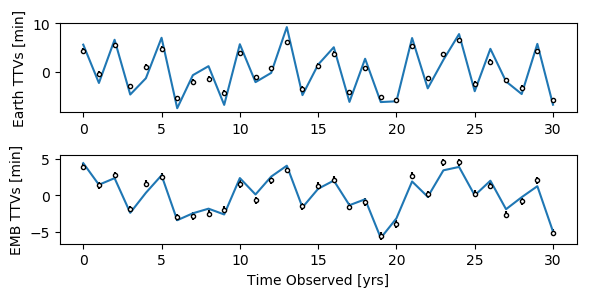

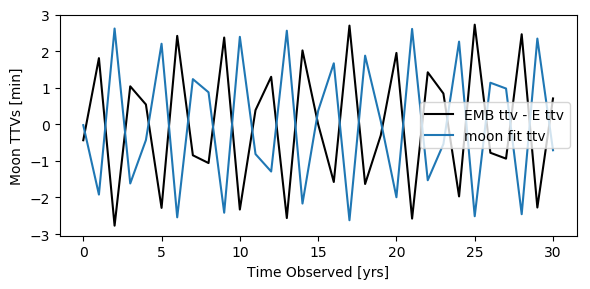

In [235]:
# 3p+moon - 3planet
plot_diff(m_33,p_33)

In [8]:
# p_31=jldopen("FITS/p3_fit30.0s10.0yrs.jld2");p_mc31 = jldopen("MCMC/p3_mcmc30.0s10.0yrs.jld2");
p_315=jldopen("FITS/fromEMB/p3_fit30.0s15.0yrs.jld2","r")#;p_mc315 = jldopen("MCMC/fromEMB/p3_mcmc30.0s15.0yrs.jld2","r");
p_32=jldopen("FITS/fromEMB/p3_fit30.0s20.0yrs.jld2","r")#;p_mc32 = jldopen("MCMC/fromEMB/p3_mcmc30.0s20.0yrs.jld2","r");
#p_mc325 = jldopen("MCMC/fromEMB/p3_mcmc30.0s25.0yrs.jld2","r")
p_325=jldopen("FITS/fromEMB/p3_fit30.0s25.0yrs.jld2","r")
#p_mc33 = jldopen("MCMC/fromEMB/p3_mcmc30.0s30.0yrs.jld2","r")#;
p_33=jldopen("FITS/fromEMB/p3_fit30.0s30.0yrs.jld2","r")
# p_34=jldopen("FITS/p3_fit30.0s40.0yrs.jld2");p_mc34 = jldopen("MCMC/p3_mcmc30.0s40.0yrs.jld2");

In [11]:
m33 = jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/moon_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 deltaphi
 ├─🔢 lprob_dp
 ├─🔢 best_dp
 ├─🔢 lprob_best_dp
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [119]:
p_615=jldopen("FITS/p3_fit60.0s15.0yrs.jld2");p_mc615 = jldopen("MCMC/p3_mcmc60.0s15.0yrs.jld2");
p_62=jldopen("FITS/p3_fit60.0s20.0yrs.jld2");p_mc62 = jldopen("MCMC/p3_mcmc60.0s20.0yrs.jld2");
p_625=jldopen("FITS/p3_fit60.0s25.0yrs.jld2");p_mc625 = jldopen("MCMC/p3_mcmc60.0s25.0yrs.jld2");
p_63=jldopen("FITS/p3_fit60.0s30.0yrs.jld2");p_mc63 = jldopen("MCMC/p3_mcmc60.0s30.0yrs.jld2");

In [120]:
p_915=jldopen("FITS/p3_fit90.0s15.0yrs.jld2");p_mc915 = jldopen("MCMC/p3_mcmc90.0s15.0yrs.jld2");
p_92=jldopen("FITS/p3_fit90.0s20.0yrs.jld2");p_mc92 = jldopen("MCMC/p3_mcmc90.0s20.0yrs.jld2");
p_925=jldopen("FITS/p3_fit90.0s25.0yrs.jld2");p_mc925 = jldopen("MCMC/p3_mcmc90.0s25.0yrs.jld2");
p_93=jldopen("FITS/p3_fit90.0s30.0yrs.jld2");p_mc93 = jldopen("MCMC/p3_mcmc90.0s30.0yrs.jld2");

In [121]:
p_1215=jldopen("FITS/p3_fit120.0s15.0yrs.jld2");p_mc1215 = jldopen("MCMC/p3_mcmc120.0s15.0yrs.jld2");
p_122=jldopen("FITS/p3_fit120.0s20.0yrs.jld2");p_mc122 = jldopen("MCMC/p3_mcmc120.0s20.0yrs.jld2");
p_1225=jldopen("FITS/p3_fit120.0s25.0yrs.jld2");p_mc1225 = jldopen("MCMC/p3_mcmc120.0s25.0yrs.jld2");
p_123=jldopen("FITS/p3_fit120.0s30.0yrs.jld2");p_mc123 = jldopen("MCMC/p3_mcmc120.0s30.0yrs.jld2");

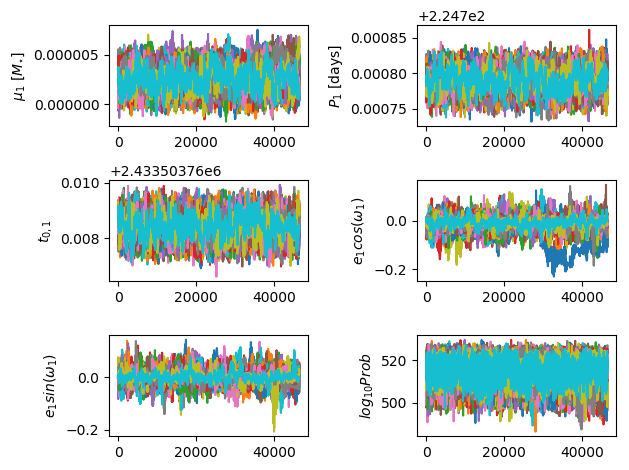

In [98]:
include("plot_emcee.jl")
plot_emcee(m_mc93,"venus")
savefig("IMAGES/traces/m_mc93v.png")
# xlim(-1,10)

### Linear Fit to Posterior mean and/or std

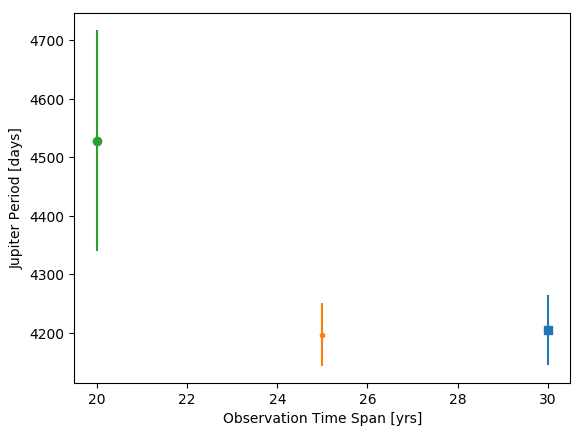

PyObject Text(0.5, 24.0, 'Observation Time Span [yrs]')

In [152]:
function plot_col(col_num)
errorbar(30,mean(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),std(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),fmt="s")#,color="black",mec="black",mfc="white")
errorbar(25,mean(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc325["nsteps"],col_num]),std(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc325["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
errorbar(20,mean(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),std(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
# errorbar(15,mean(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),std(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
# errorbar(10,mean(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),std(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
    xlabel("Observation Time Span [yrs]")
end
    ylabel("Jupiter Period [days]")
plot_col(12)

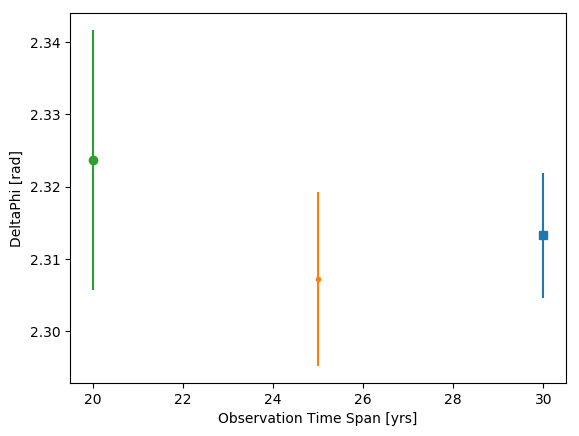

PyObject Text(0.5, 24.0, 'Observation Time Span [yrs]')

In [151]:
function plot_col(col_num,f1,f2,f3,f4)
errorbar(30,mean(m_mc33["par_mcmc"][:,m_mc33["iburn"]:m_mc33["nsteps"],col_num]),std(m_mc33["par_mcmc"][:,m_mc33["iburn"]:m_mc33["nsteps"],col_num]),fmt="s")#,color="black",mec="black",mfc="white")
errorbar(25,mean(m_mc325["par_mcmc"][:,m_mc325["iburn"]:m_mc325["nsteps"],col_num]),std(m_mc325["par_mcmc"][:,m_mc325["iburn"]:m_mc325["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
errorbar(20,mean(m_mc32["par_mcmc"][:,m_mc32["iburn"]:m_mc32["nsteps"],col_num]),std(m_mc32["par_mcmc"][:,m_mc32["iburn"]:m_mc32["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
# errorbar(15,mean(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),std(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
# errorbar(10,mean(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),std(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
    xlabel("Observation Time Span [yrs]")
end
    ylabel("DeltaPhi [rad]")
plot_col(18)

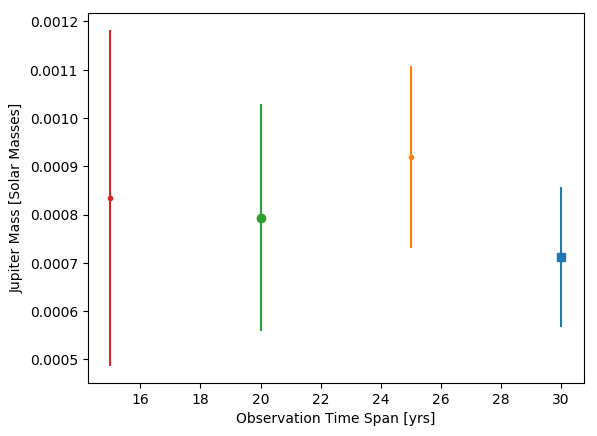

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [116]:
function EV_vals(sigma,nyear,np)
mcfile = string("MCMC/",np,"_mcmc",sigma,"s",nyear,"yrs.jld2")
jldmc = jldopen(String(mcfile),"r")
par_mcmc,lprob_mcmc = jldmc["par_mcmc"],jldmc["lprob_mcmc"]
param = jldmc["param"]
iburn,samples = jldmc["iburn"], jldmc["indepsamples"]
nwalkers,nsteps = jldmc["nwalkers"],jldmc["nsteps"]
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
      "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
      "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
    "sig sys"]
for i=1:3
# println(pname[(i-1)*5+1]," ",pname[(i-1)*5+2]," ",pname[(i-1)*5+3]," ",pname[(i-1)*5+4]," ",pname[(i-1)*5+5])
println(mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," \pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+2]))," \pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+3]))," \pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+4]))," \pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))," ",
        mean(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+5]))," \pm ",std(vec(par_mcmc[:,iburn:nsteps,(i-1)*5+1]))
        )
        
#             println(vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH, vec(par_mcmc[:,iburn:nsteps,2]),vec(par_mcmc[:,iburn:nsteps,3]),vec(par_mcmc[:,iburn:nsteps,4]),vec(par_mcmc[:,iburn:nsteps,5]))
#         println("param ",i," mean ",mean(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i])," with std +/- ", std(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i]))
end
end

post_vals (generic function with 1 method)

In [117]:
post_vals(p_mc32)

2.364751873800224e-6 +/- 2.916966620053028e-7 224.70078387081927 +/- 2.916966620053028e-7 2.433503765317898e6 +/- 2.916966620053028e-7 0.006736458023321758 +/- 2.916966620053028e-7 0.008092358962561896 +/- 2.916966620053028e-7
2.9829627070934226e-6 +/- 1.9150466729371826e-7 365.25641221939264 +/- 1.9150466729371826e-7 2.433624402724006e6 +/- 1.9150466729371826e-7 0.018370397598285296 +/- 1.9150466729371826e-7 0.007472170768977 +/- 1.9150466729371826e-7
0.0007937586488009844 +/- 0.00023592189287406537 4528.761088071658 +/- 0.00023592189287406537 2.4391752970107966e6 +/- 0.00023592189287406537 0.004126016886280481 +/- 0.00023592189287406537 -0.04983496484086676 +/- 0.00023592189287406537


### Lunar fit

In [6]:
m_32=jldopen("FITS/moon_fit30.0s20.0yrs.jld2");m_mc32 = jldopen("MCMC/moon_mcmc30.0s20.0yrs.jld2");
m_325=jldopen("FITS/moon_fit30.0s25.0yrs.jld2");m_mc325 = jldopen("MCMC/moon_mcmc30.0s25.0yrs.jld2");
m_33=jldopen("FITS/moon_fit30.0s30.0yrs.jld2");m_mc33 = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2");

In [7]:
m_62=jldopen("FITS/moon_fit60.0s20.0yrs.jld2");m_mc62 = jldopen("MCMC/moon_mcmc60.0s20.0yrs.jld2");
m_625=jldopen("FITS/moon_fit60.0s25.0yrs.jld2");m_mc625 = jldopen("MCMC/moon_mcmc60.0s25.0yrs.jld2");
m_63=jldopen("FITS/moon_fit60.0s30.0yrs.jld2");m_mc63 = jldopen("MCMC/moon_mcmc60.0s30.0yrs.jld2");

In [8]:
m_92=jldopen("FITS/moon_fit90.0s20.0yrs.jld2");m_mc92 = jldopen("MCMC/moon_mcmc90.0s20.0yrs.jld2");
m_925=jldopen("FITS/moon_fit90.0s25.0yrs.jld2");m_mc925 = jldopen("MCMC/moon_mcmc90.0s25.0yrs.jld2");
m_93=jldopen("FITS/moon_fit90.0s30.0yrs.jld2");m_mc93 = jldopen("MCMC/moon_mcmc90.0s30.0yrs.jld2");

### 2-planet MCMC

In [20]:
include("MCMC.jl")

MCMC (generic function with 1 method)

In [21]:
1-sum(m_33["ntrans"][1:2] )/2 * log(667.8479408806473)
# Nobs = sum()

-259.1624205684809

In [23]:
MCMC("MCMC/p2_mcmc30.0s30.0yrs.jld2",[4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722],
    -259.1624205684809,10000,50,2,m_33["ntrans"][1:2],m_33["tt0"],m_33["tt"],m_33["sigtt"],true,true)

Parameters from fit: [4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722]
Maximum log Prob from fit: -259.1624205684809
Step: 193 Walker: 42 Trial Log Prob: 426.49314303794404 Prob: 1.2710845222989337e-7 Frac: 0.4260526861646961
Step: 293 Walker: 34 Trial Log Prob: 473.82203892999183 Prob: 1.005490785208814 Frac: 0.4230558972256389
Step: 370 Walker: 49 Trial Log Prob: 493.2463334225217 Prob: 0.25319213944931385 Frac: 0.4233201794691605
Step: 572 Walker: 36 Trial Log Prob: 517.5322863903355 Prob: 0.001594701592098923 Frac: 0.40918631497936053
Step: 584 Walker: 35 Trial Log Prob: 513.5953264857309 Prob: 0.4843221013987992 Frac: 0.4091485352064417
Step: 608 Walker: 46 Trial Log Prob: 518.8336758842289 Prob: 0.07254184825454627 Frac: 0.4077839189367022
Number of steps: 1000 Acceptance Rate: 0.39362
Step: 1001 Walker: 10 Trial Lo

([75.28769233479389 219.3594460186767 … 516.4881994945473 516.4881994945473; -444.65886672058883 -179.91995136093811 … 518.9664783752439 518.9664783752439; … ; -6.207035479125622 8.101604707805357 … 515.0457994095664 516.7171326214575; -590.5867961707044 -590.5867961707044 … 516.3621801274104 514.7776681213268], [4.445630411721898e-6 4.415787023431983e-6 … 4.206582338987755e-6 4.206582338987755e-6; 4.422629575203517e-6 4.434748781693544e-6 … 4.668535978959624e-6 4.668535978959624e-6; … ; 4.421228165235299e-6 4.487950235042027e-6 … 5.371583333236327e-6 5.212825825179325e-6; 4.358749104252416e-6 4.358749104252416e-6 … 4.278023225622351e-6 4.2086541016973845e-6]

[224.700772340187 224.7007758152718 … 224.70077643355427 224.70077643355427; 224.7007664603429 224.700765708711 … 224.70077526896767 224.70077526896767; … ; 224.7007948253631 224.7007858316187 … 224.70077304449623 224.70077747636677; 224.70077991916642 224.70077991916642 … 224.70078876795066 224.70079300411328]

[2.43350376875570

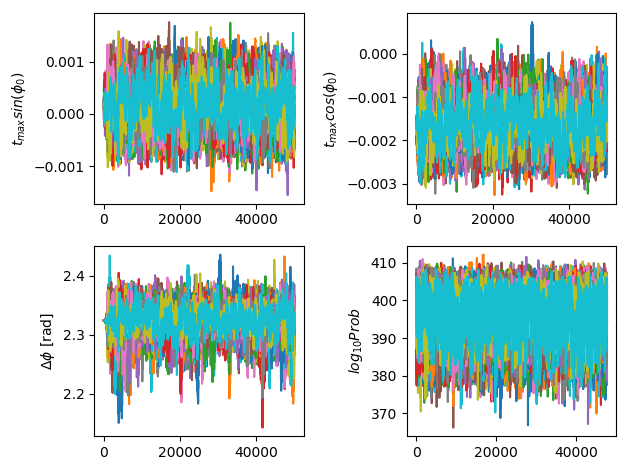

In [155]:
include("plot_emcee.jl")
plot_emcee(m_mc32,"moon")
# savefig("IMAGES/traces/m_mc32.png")

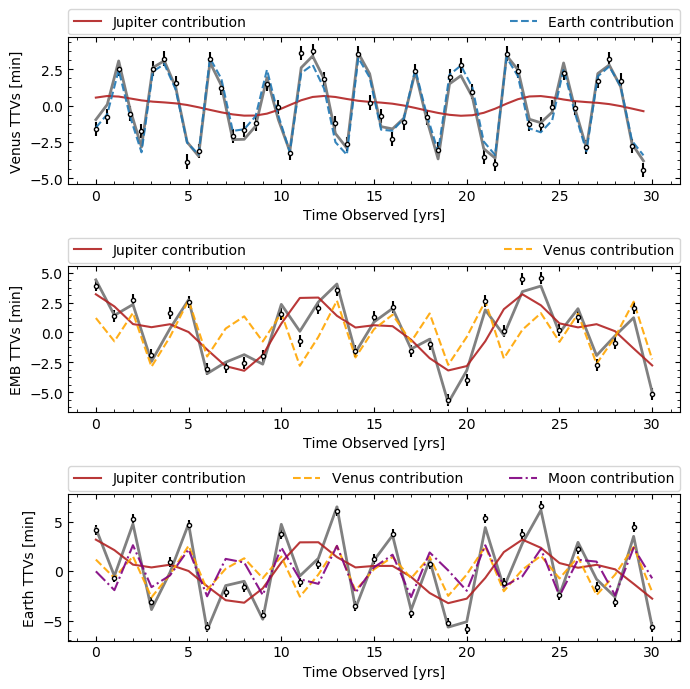

Simulated with σ= 30.0 second noise


In [167]:
include("plot_ttvs.jl")
plot_ttvs(p_33,true)

### 4-planet fit

In [99]:
p4_33=jldopen("FITS/p4_fit30.0s30.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/p4_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 pbest_p3
 ├─🔢 pbest
 ├─🔢 lprob_p3
 ├─🔢 lprob_p4
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 p4in
 ├─🔢 p4out
 └─🔢 np4

In [100]:
tt,tt0,sigtt,ttmodel = p4_33["tt"],p4_33["tt0"],p4_33["sigtt"],p4_33["ttmodel"]
pbest_global = p4_33["pbest_global"]
nplanet,ntrans = p4_33["nplanet"],p4_33["ntrans"]

(4, [49, 31, 2, 2])

In [103]:
p4grid = (10 .^ range(log10(p4_33["p4in"]),stop=log10(p4_33["p4out"]),length=p4_33["np4"])) /365.25
p4prob = exp.((p4_33["lprob_p4"] .-maximum(p4_33["lprob_p4"])))
p3grid = (10 .^ range(log10(p4_33["p3in"]),stop=log10(p4_33["p3out"]),length=p4_33["np3"])) /365.25
p3prob = exp.((p4_33["lprob_p3"] .-maximum(p4_33["lprob_p3"])))

200-element Array{Float64,1}:
 8.174513390990908e-6 
 1.0141026378213929e-5
 1.2562492253738193e-5
 1.55392540823593e-5  
 1.9192754695896975e-5
 2.3669381142565954e-5
 2.9145754854841736e-5
 3.583321951280932e-5 
 4.3985442755126785e-5
 5.390640152053625e-5 
 6.595875251522945e-5 
 8.057288497651134e-5 
 9.826136884802771e-5 
 ⋮                    
 4.31034732084169e-5  
 3.5024830243158384e-5
 2.8427280230001212e-5
 2.3046356070652183e-5
 1.866375692848235e-5 
 1.509899208587321e-5 
 1.2202670022128159e-5
 9.852516098535678e-6 
 7.947648556946693e-6 
 6.4054465066999665e-6
 5.158168189928175e-6 
 4.150455555424673e-6 

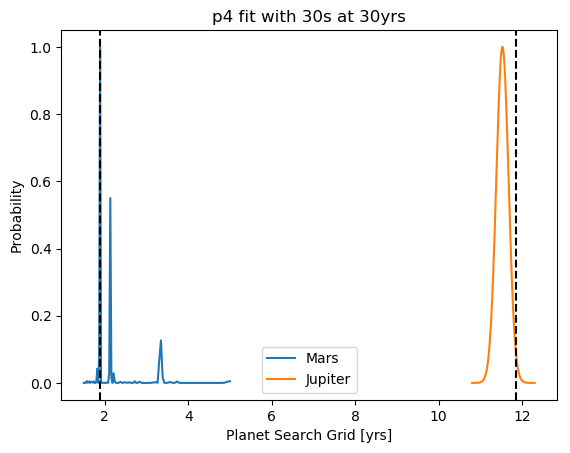

PyObject <matplotlib.legend.Legend object at 0x3356c0a58>

In [113]:
plot(p4grid,p4prob,label="Mars")
plot(p3grid,p3prob,label="Jupiter")
axvline(11.86,linestyle="--",color="black")
axvline(1.88,linestyle="--",color="black")
ylabel("Probability")
xlabel("Planet Search Grid [yrs]")
title("p4 fit with 30s at 30yrs")
legend()

In [44]:
fitfile = string("FITS/moon_fit",30.0,"s",30.0,"yrs.jld2")
f = jldopen(String(fitfile),"r")
# mcfile = string("MCMC/p3_mcmc",sigma,"s",nyear,"yrs.jld2")
# m = jldopen(String(mcfile),"r")
tt,tt0,sigtt,ttmodel = f["tt"],f["tt0"],f["sigtt"],f["ttmodel"]
pbest_global = f["lprob_best_p3"]
nplanet,ntrans = f["nplanet"],f["ntrans"]
pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
n1,n2 = ntrans[1],ntrans[2]
mu1,P1,t01,ecos1,esin1 = pbest_global[1:5]
mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
mu3,P3,t03,ecos3,esin3 = pbest_global[11:15]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1,tt2 = tt[1:n1],tt[n1+1:n1+n2]
ttsim1,ttsim2 = (ttmodel[1:n1].-t01)./365.25,(ttmodel[n1+1:n1+n2].-t02)./365.25 #in years
ttv1,ttv2 = (tt1.-time1).* (24 * 60),(tt2.-time2).* (24 * 60) #in minutes
sigtt1,sigtt2 = sigtt[1:n1].* (24 * 60),sigtt[n1+1:n1+n2].* (24 * 60) #in minutes
  plot(ttsim1,pair_ttvs[1,3,1:n1]+pair_ttvs[1,2,1:n1],linewidth=2,color="grey")#,label="Total variations")
  plot(ttsim1,pair_ttvs[1,3,1:n1],color="firebrick",label="Jupiter contribution",alpha=0.9)
  plot(ttsim1,pair_ttvs[1,2,1:n1],label="Earth contribution",alpha=0.9,linestyle="--")

MethodError: [91mMethodError: no method matching getindex(::Float64, ::UnitRange{Int64})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  getindex(::Number) at number.jl:75[39m
[91m[0m  getindex(::Number, [91m::Integer[39m) at number.jl:77[39m
[91m[0m  getindex(::Number, [91m::Integer...[39m) at number.jl:82[39m
[91m[0m  ...[39m